# SETUP

The first part of the code sets up the pca_wavelet network, the training comes later. Most of this code comes from the original authors

In [111]:
import sys
sys.path.append('../segmentation_helper')

import tensorflow as tf
import keras
import tqdm
import matplotlib.pyplot as plt
import numpy as np
import data_loader as dl
import model_broker as mb
import os

In [112]:
tf.keras.backend.set_floatx("float64")

In [114]:
loader = dl.DataLoader(IMAGE_SIZE=64,debug=True)
img_train,img_test = loader.import_processed_img()
seg_train,seg_test = loader.import_processed_seg()
combined_train, combined_test = loader.import_processed_combined()

In [115]:
def scaledtanh(x): 
    return tf.math.tanh(x*0.5)

def scaledatanh(x):
    return tf.math.atanh(x)*2.0


In [124]:
img_broker = mb.ModelBroker(trainset=img_train,
                            testset=img_test,
                            dirname="bird_img",
                            keep_percent=0.3,
                            count=3,
                            sample_size=100)
                            #activity_regularizer = scaledtanh,
                            #inverse_activity_regularizer=scaledatanh,
                            #activation_before=True)
imghead,imginvhead = img_broker.build_model()
imghead,imginvhead = img_broker.load_model()                                      


keep_percent 0.29752575559207534
meanimg.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
Starting level 0
Completing 32.0
pca shape tf.Tensor([27 27], shape=(2,), dtype=int32)
keep_channels 8 keep_max 12.0
keep_channels 8
ufilts.shape (1, 1, 1, 27, 8)
end loop 32.0
Starting level 1
Completing 16.0
pca shape tf.Tensor([72 72], shape=(2,), dtype=int32)
keep_channels 21 keep_max 128.0
keep_channels 21
ufilts.shape (1, 1, 1, 72, 21)
end loop 16.0
Starting level 2
Completing 8.0
pca shape tf.Tensor([189 189], shape=(2,), dtype=int32)
keep_channels 56 keep_max 1344.0
keep_channels 56
ufilts.shape (1, 1, 1, 189, 56)
end loop 8.0
saving to: models/bird_img
out.shape (1, 8, 8, 56)
keep_percent 0.29752575559207534
meanimg.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
Starting level 0
Completing 32.0
pca shape tf.Tensor([27 27], shape=(2,), dtype=int32)
keep_channels 8 keep_max 12.0
keep_channels 8
ufi

In [125]:
seg_broker = mb.ModelBroker(trainset=seg_train,
                            testset=seg_test,
                            dirname="bird_seg",
                            keep_percent=0.3,
                            count=3,
                            sample_size=100)
                            #activity_regularizer =scaledtanh ,
                            #inverse_activity_regularizer=scaledatanh ,
                            #activation_before=False)
seghead,seginvhead = seg_broker.build_model()                                        
seghead,seginvhead = seg_broker.load_model()

keep_percent 0.29752575559207534
meanimg.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
Starting level 0
Completing 32.0
pca shape tf.Tensor([27 27], shape=(2,), dtype=int32)
keep_channels 8 keep_max 12.0
keep_channels 8
ufilts.shape (1, 1, 1, 27, 8)
end loop 32.0
Starting level 1
Completing 16.0
pca shape tf.Tensor([72 72], shape=(2,), dtype=int32)
keep_channels 21 keep_max 128.0
keep_channels 21
ufilts.shape (1, 1, 1, 72, 21)
end loop 16.0
Starting level 2
Completing 8.0
pca shape tf.Tensor([189 189], shape=(2,), dtype=int32)
keep_channels 56 keep_max 1344.0
keep_channels 56
ufilts.shape (1, 1, 1, 189, 56)
end loop 8.0
saving to: models/bird_seg
out.shape (1, 8, 8, 56)
keep_percent 0.29752575559207534
meanimg.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
Starting level 0
Completing 32.0
pca shape tf.Tensor([27 27], shape=(2,), dtype=int32)
keep_channels 8 keep_max 12.0
keep_channels 8
ufi

sample.shape (64, 64, 3)
array([[[0.4321768 , 0.52629441, 0.70146292],
        [0.43578431, 0.53897059, 0.69803923],
        [0.42106313, 0.51910233, 0.67988664],
        ...,
        [0.41736367, 0.5139553 , 0.71174943],
        [0.41369486, 0.51221663, 0.66763175],
        [0.42559743, 0.51652122, 0.67787993]],

       [[0.42659315, 0.52879906, 0.7118873 ],
        [0.43551624, 0.53269762, 0.69605547],
        [0.43741575, 0.53582263, 0.69636184],
        ...,
        [0.43124235, 0.52928162, 0.68875617],
        [0.42633271, 0.5201593 , 0.67971814],
        [0.41924021, 0.51117498, 0.6782859 ]],

       [[0.4320389 , 0.53007817, 0.69086248],
        [0.42732078, 0.52466303, 0.68753833],
        [0.41918659, 0.53229934, 0.6974954 ],
        ...,
        [0.42566636, 0.53485757, 0.6919654 ],
        [0.41793811, 0.50829506, 0.67133886],
        [0.43358609, 0.5200215 , 0.67441028]],

       ...,

       [[0.9660846 , 0.93338692, 0.14306067],
        [0.36934742, 0.34370404, 0.11989889

array([[[0.4321768 , 0.52629441, 0.70146292],
        [0.43578431, 0.53897059, 0.69803923],
        [0.42106313, 0.51910233, 0.67988664],
        ...,
        [0.41736367, 0.5139553 , 0.71174943],
        [0.41369486, 0.51221663, 0.66763175],
        [0.42559743, 0.51652122, 0.67787993]],

       [[0.42659315, 0.52879906, 0.7118873 ],
        [0.43551624, 0.53269762, 0.69605547],
        [0.43741575, 0.53582263, 0.69636184],
        ...,
        [0.43124235, 0.52928162, 0.68875617],
        [0.42633271, 0.5201593 , 0.67971814],
        [0.41924021, 0.51117498, 0.6782859 ]],

       [[0.4320389 , 0.53007817, 0.69086248],
        [0.42732078, 0.52466303, 0.68753833],
        [0.41918659, 0.53229934, 0.6974954 ],
        ...,
        [0.42566636, 0.53485757, 0.6919654 ],
        [0.41793811, 0.50829506, 0.67133886],
        [0.43358609, 0.5200215 , 0.67441028]],

       ...,

       [[0.9660846 , 0.93338692, 0.14306067],
        [0.36934742, 0.34370404, 0.11989889],
        [0.49586397, 0

pred.shape (1, 8, 8, 56)
recon.shape (64, 64, 3)
sample.dtype <dtype: 'float64'>
recon[0].dtype <dtype: 'float64'>
np.prod(sample.shape) 12288
psnr =  21.032438051256072
ncc =  [[1.         0.83371682]
 [0.83371682 1.        ]]
sample[30:34,30:34,0] tf.Tensor(
[[0.23797488 0.26415443 0.27917433 0.92506891]
 [0.23700981 0.26235449 0.25375307 0.31176472]
 [0.26922488 0.28059131 0.26476717 0.32715228]
 [0.4592984  0.25441179 0.26675093 0.49057907]], shape=(4, 4), dtype=float64)
recon[30:34,30:34,0] tf.Tensor(
[[0.24922756 0.26938409 0.39167631 0.54730086]
 [0.24182428 0.32440397 0.34150453 0.40719089]
 [0.24622264 0.34116176 0.41346918 0.46881233]
 [0.2895649  0.34944522 0.43905619 0.52598957]], shape=(4, 4), dtype=float64)


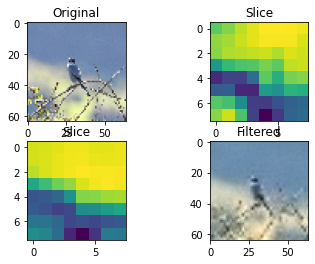

In [126]:
img_broker.check_build(imghead,imginvhead,img_train)

sample.shape (64, 64, 3)
array([[[0.39509803, 0.39509803, 0.39509803],
        [0.75698531, 0.75698531, 0.75698531],
        [0.75539219, 0.75539219, 0.75539219],
        ...,
        [0.7594133 , 0.7594133 , 0.7594133 ],
        [0.75698531, 0.75698531, 0.75698531],
        [0.38992035, 0.38992035, 0.38992035]],

       [[0.48750001, 0.48750001, 0.48750001],
        [0.91727173, 0.91727173, 0.91727173],
        [0.9089461 , 0.9089461 , 0.9089461 ],
        ...,
        [0.91433823, 0.91433823, 0.91433823],
        [0.9159314 , 0.9159314 , 0.9159314 ],
        [0.48998931, 0.48998931, 0.48998931]],

       [[0.48750001, 0.48750001, 0.48750001],
        [0.92144608, 0.92144608, 0.92144608],
        [0.92512256, 0.92512256, 0.92512256],
        ...,
        [0.90220588, 0.90220588, 0.90220588],
        [0.90595132, 0.90595132, 0.90595132],
        [0.4844133 , 0.4844133 , 0.4844133 ]],

       ...,

       [[0.4906863 , 0.4906863 , 0.4906863 ],
        [0.8918581 , 0.8918581 , 0.8918581 

array([[[0.39509803, 0.39509803, 0.39509803],
        [0.75698531, 0.75698531, 0.75698531],
        [0.75539219, 0.75539219, 0.75539219],
        ...,
        [0.7594133 , 0.7594133 , 0.7594133 ],
        [0.75698531, 0.75698531, 0.75698531],
        [0.38992035, 0.38992035, 0.38992035]],

       [[0.48750001, 0.48750001, 0.48750001],
        [0.91727173, 0.91727173, 0.91727173],
        [0.9089461 , 0.9089461 , 0.9089461 ],
        ...,
        [0.91433823, 0.91433823, 0.91433823],
        [0.9159314 , 0.9159314 , 0.9159314 ],
        [0.48998931, 0.48998931, 0.48998931]],

       [[0.48750001, 0.48750001, 0.48750001],
        [0.92144608, 0.92144608, 0.92144608],
        [0.92512256, 0.92512256, 0.92512256],
        ...,
        [0.90220588, 0.90220588, 0.90220588],
        [0.90595132, 0.90595132, 0.90595132],
        [0.4844133 , 0.4844133 , 0.4844133 ]],

       ...,

       [[0.4906863 , 0.4906863 , 0.4906863 ],
        [0.8918581 , 0.8918581 , 0.8918581 ],
        [0.89436275, 0

pred.shape (1, 8, 8, 56)
recon.shape (64, 64, 3)
sample.dtype <dtype: 'float64'>
recon[0].dtype <dtype: 'float64'>
np.prod(sample.shape) 12288
psnr =  21.70583761562068
ncc =  [[1.        0.9805802]
 [0.9805802 1.       ]]
sample[30:34,30:34,0] tf.Tensor(
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], shape=(4, 4), dtype=float64)
recon[30:34,30:34,0] tf.Tensor(
[[ 0.00016394 -0.01292935  0.01870828 -0.02134812]
 [-0.01135477 -0.02976594  0.00136592 -0.01246042]
 [-0.02383091 -0.05816586 -0.00528714  0.00735074]
 [-0.01101008 -0.02247857  0.00058071  0.00949543]], shape=(4, 4), dtype=float64)


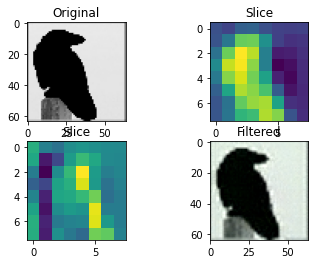

In [127]:
seg_broker.check_build(
    seghead,seginvhead,seg_train)

# Training

This is the loop used to find the variables to find A and b in y=Ax+b

In [128]:
imgflat = np.prod(imghead(next(iter(img_train))[0]).shape)
segflat = np.prod(seghead(next(iter(seg_train))[0]).shape)

In [129]:
reconstruct = seghead(next(iter(seg_train))[0]).shape

In [130]:
end_shape = next(iter(seg_train))[0].shape

In [165]:
n = 0.0


xxt = np.zeros([imgflat])
yxt = np.zeros([segflat])
x = np.zeros([imgflat])
y = np.zeros([segflat]) 

bar = tqdm.notebook.tqdm(total = int(combined_train.cardinality()))

for item in iter(combined_train):
    bar.update(1)
    image = item[0][0]
    segmentation = item[0][1]
    
    imgdecom = imghead(image)
    segdecom = seghead(segmentation)
    
    mat = tf.reshape(imgdecom,[-1])
    segmat = tf.reshape(segdecom,[-1])
    
    cov = tf.matmul([mat],[mat],transpose_a=True)
    xxt += cov
    #del cov
    segcov = tf.matmul([mat],[segmat],transpose_a=True)
    yxt += segcov
    #del segcov
    x+=mat
    y+=segmat
    
    n += 1

  0%|          | 0/101 [00:00<?, ?it/s]

In [166]:
directory = "pca_vars/"+"seg2img"
if not os.path.exists(directory):
    os.makedirs(directory)

In [167]:
np.save(directory+"/xxt",xxt)
np.save(directory+"/yxt",yxt)
np.save(directory+"/x",x)
np.save(directory+"/y",y)
np.save(directory+"/n",n)

## Calculating A and B

This section uses the values found in the training loop to calculate values for A and B

In [293]:
xxt = np.load(directory+"/xxt.npy")
yxt = np.load(directory+"/yxt.npy")
x = np.load(directory+"/x.npy")
y = np.load(directory+"/y.npy")
n = np.load(directory+"/n.npy")

In [178]:
xxt = xxt - tf.matmul([x],[x],transpose_a=True)/n
yxt = yxt - tf.matmul([x],[y],transpose_a=True)/n

In [179]:
inverse_xxt = tf.linalg.pinv(xxt)

In [206]:
A = tf.linalg.matmul(inverse_xxt,yxt)

In [ ]:
del inverse_xxt

In [ ]:
import gc
gc.collect()

In [297]:
b = (y - tf.linalg.matvec(A,x,transpose_a=True))/n

In [296]:
b

<tf.Tensor: shape=(1, 1, 3584), dtype=float64, numpy=
array([[[ 0.38206871,  0.17493115,  0.01912785, ..., -0.22636317,
         -0.1023202 , -0.12832846]]])>

In [211]:
img_train, img_test = loader.import_processed_img()

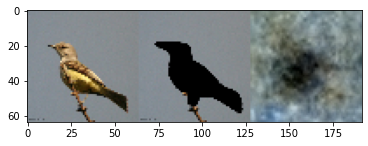

In [322]:
image,seg_base = next(iter(combined_test.shuffle(100)))[0]
imgdecom = imghead(image)
imgdecom = tf.reshape(imgdecom,(1,-1))
segdecom = tf.linalg.matvec(A,imgdecom,transpose_a=True)+b
seg = seginvhead(tf.reshape(segdecom,(reconstruct)))
plt.imshow(np.hstack([image,seg_base,seg[0]]))

In [245]:
tf.reduce_max(seg)

<tf.Tensor: shape=(), dtype=float64, numpy=2.44665693290274>